In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2.Load Dataset
data = pd.read_csv("viettri_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,44,17,29,2,9,4
1,3/2/2019,65,37,27,4,12,4
2,3/3/2019,81,38,2,1,1,2
3,3/4/2019,51,24,21,4,8,1
4,3/5/2019,43,7,23,1,12,4
...,...,...,...,...,...,...,...
1915,5/28/2024,38,24,35,1,15,5
1916,5/29/2024,38,17,41,7,15,10
1917,5/30/2024,28,8,11,1,15,1
1918,5/31/2024,12,12,16,1,16,7


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,42.395313,22.470833,17.391667,7.528125,9.497917,3.961979
std,31.665288,16.124166,12.907283,4.971229,6.526731,2.516048
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,10.000000,8.750000,3.000000,4.000000,2.000000
50%,35.000000,20.000000,15.000000,7.000000,9.000000,4.000000
75%,59.000000,32.000000,24.000000,11.000000,14.000000,6.000000
max,178.000000,94.000000,114.000000,35.000000,27.000000,22.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,44
1,65
2,81
3,51
4,43
...,...
1915,38
1916,38
1917,28
1918,12


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)


<Axes: >

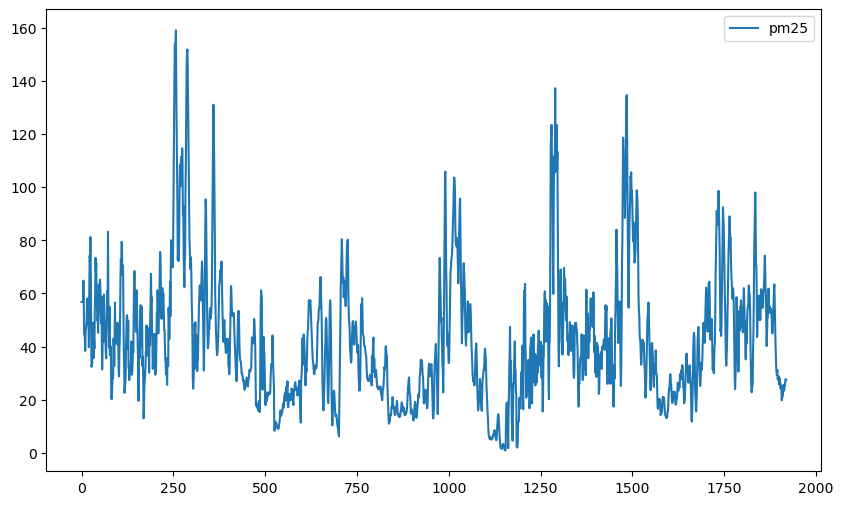

In [6]:
data.plot(figsize=(10,6))

In [7]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1344
Test data size: 576


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9128.936, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9033.506, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9050.771, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9126.939, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9028.220, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9029.849, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8999.992, Time=1.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9030.203, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9000.212, Time=3.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9028.735, Time=1.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.88 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8997.993, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9028.203, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=9

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [10]:
y_pred = pd.DataFrame(y_pred, columns=['pm25'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [11]:
# 4. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+91, step=1)

# Tạo mảng 90 ngày 
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# # In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[47.16220897 49.28063738 49.27151023 49.93016899 49.56360423 49.96926411
 49.63213615 49.94347928 49.66752078 49.91598225 49.69362374 49.89308281
 49.71432389 49.87458563 49.73092589 49.85970997 49.74426344 49.84775449
 49.75498109 49.83814686 49.76359378 49.83042612 49.77051497 49.82422169
 49.77607686 49.81923579 49.78054642 49.81522911 49.78413817 49.81200932
 49.78702452 49.80942188 49.789344   49.80734261 49.79120794 49.80567169
 49.79270582 49.80432894 49.79390951 49.8032499  49.79487681 49.80238278
 49.79565413 49.80168596 49.79627879 49.80112599 49.79678076 49.800676
 49.79718416 49.80031438 49.79750832 49.80002378 49.79776883 49.79979026
 49.79797817 49.7996026  49.79814639 49.79945179 49.79828158 49.7993306
 49.79839022 49.79923322 49.79847752 49.79915496 49.79854768 49.79909207
 49.79860405 49.79904153 49.79864936 49.79900091 49.79868577 49.79896828
 49.79871502 49.79894205 49.79873853 49.79892097 49.79875743 49.79890404
 49.798

In [12]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 22.514761522089902

Testing MAPE: 53.78288544846398

MAE: 17.96645567352102


In [13]:
test_data.index

RangeIndex(start=1344, stop=1920, step=1)

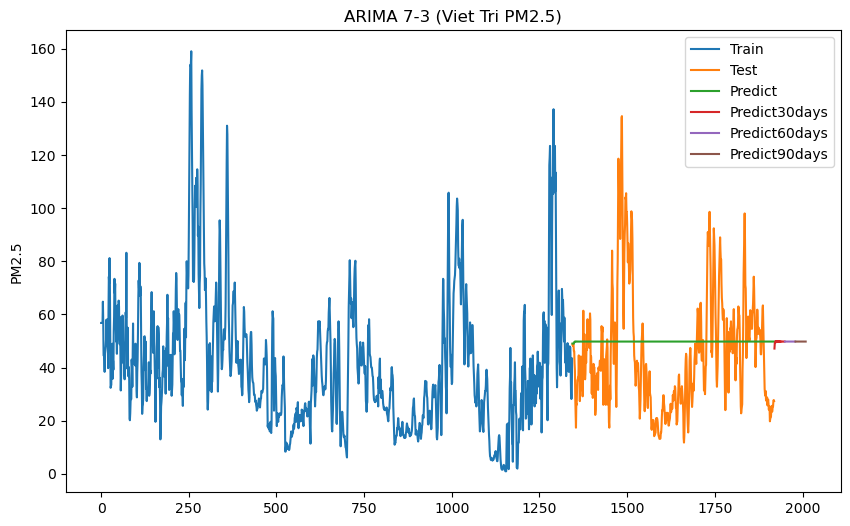

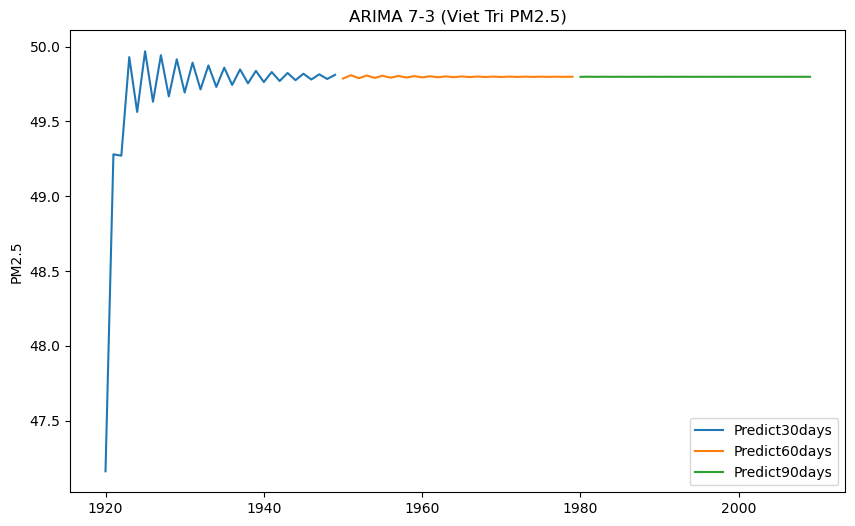

In [14]:
# 9.Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 7-3 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 7-3 (Viet Tri PM2.5)')
plt.ylabel('PM2.5')
plt.show()

